# Feature Selection for use with Classification
The below section will look at analysing the 10 best features to be used with the prediction labels 'Education_Attainment' and 'Major_Occupation'

## Feature Importance
First I will used Feature importance to get a score for each feature of the data, the higher the score more important or relevant is the feature towards the output variable.

In [45]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
#creating labelEncoder
le = preprocessing.LabelEncoder()

df = pd.read_csv('../resources/originalCleanedDataFrame.csv')
data=data.fillna("")
data = data.apply(le.fit_transform)

X = data[data.columns.difference(['Education_Attainment', 'Major_Occupation','who'])]
y = data[['Education_Attainment', 'Major_Occupation']]


/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.04017709 0.05030156 0.0241863  0.01589044 0.01813968 0.00954522
 0.01260533 0.0090604  0.01290748 0.00802282 0.01141081 0.03482068
 0.00125857 0.0027298  0.00302406 0.00760992 0.00273044 0.0054797
 0.02774861 0.01956719 0.0357935  0.00868478 0.00685223 0.00755546
 0.0129081  0.00476384 0.00425091 0.00911576 0.0091919  0.01868376
 0.01472376 0.02772216 0.03248694 0.00344461 0.01031062 0.00932298
 0.00438753 0.01535173 0.01270377 0.01885224 0.00992266 0.00886072
 0.0112013  0.0077113  0.01123153 0.01133262 0.01508991 0.01305812
 0.01839722 0.00672001 0.01157461 0.01305997 0.02811619 0.02565456
 0.00949019 0.02687341 0.0139671  0.01668691 0.01526817 0.01706402
 0.01858836 0.00109924 0.00445708 0.00755676 0.00841662 0.01097087
 0.01775685 0.02749071 0.0280603 ]


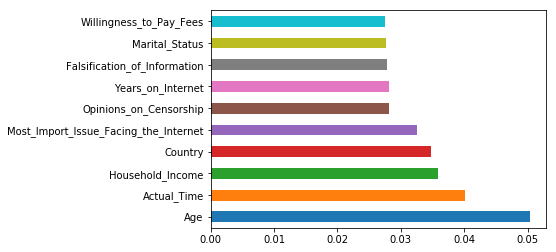

In [46]:
model = ExtraTreesClassifier()

def feature_selector(y):
    model.fit(X,y)
    print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.show()
    
yEducation = data['Education_Attainment']
yOccupation = data['Major_Occupation']
feature_selector(yEducation)

We can see that for the label Education_Attainment our top 10 performing features are listed (Primary_Place_of_WWW_Access, Opinions_on_Censorship, Falsification_of_Information, Years_on_Internet, Marital_Status, Most_Import_Issue_Facing_the_Internet, Country, Household_Income, Actual_Time, Age) 

[0.10705053 0.0414602  0.01797084 0.01292272 0.01490903 0.01039827
 0.01087676 0.00726455 0.01750589 0.0069742  0.00953067 0.02644103
 0.00064078 0.00170407 0.00235143 0.00638836 0.0017818  0.0033779
 0.02052715 0.01583929 0.03080736 0.00699128 0.00492767 0.00510601
 0.009521   0.00318497 0.00306709 0.00675055 0.00683879 0.0142339
 0.01090351 0.02917378 0.02331062 0.00235991 0.0082684  0.00663288
 0.00374862 0.01206662 0.0095817  0.01435922 0.00781123 0.00702348
 0.00893334 0.00634934 0.00903962 0.00869131 0.01221587 0.00998515
 0.01361521 0.00539003 0.0088296  0.01022682 0.02101015 0.03260679
 0.00522992 0.03580251 0.00984504 0.01105245 0.01153084 0.01329957
 0.02338    0.00045869 0.0037084  0.01409828 0.05732621 0.02521777
 0.03454624 0.02201732 0.02300943]


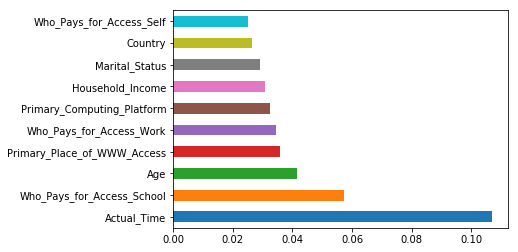

In [47]:
feature_selector(yOccupation)

We can see that for the label Education_Attainment our top 10 performing features are listed (Years_on_Internet, Country, Who_Pays_for_Access_Self, Who_Pays_for_Access_Work, Marital_Status, Household_Income, Primary_Computing_Platform, Who_Pays_for_Access_School, Primary_Place_of_WWW_Access, Age, Actual_Time)

# Univariate Selection
For Comparison, Next I will use Univariate Selection with the highest statistical rlationship with the output var.The method below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features for internet usage with each output var.

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def select_univariate(y):
    #apply SelectKBest class to extract top 10 best features
    bestfeatures = SelectKBest(score_func=chi2, k=10)
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    print(featureScores.nlargest(10,'Score'))  #print 10 best features

select_univariate(yEducation)

                                Specs        Score
1                                 Age  3676.101509
63        Who_Pays_for_Access_Parents  1288.675605
54                   Primary_Language  1210.978476
0                         Actual_Time   997.765122
66           Who_Pays_for_Access_Work   822.527497
53         Primary_Computing_Platform   711.322739
55        Primary_Place_of_WWW_Access   634.642557
8   Community_Membership_Professional   494.114917
31                     Marital_Status   464.382493
67            Willingness_to_Pay_Fees   442.035702


We can see that for the label Education_Attainment our top 10 performing features are similar, there is definitely a lot of duplciate columns from the Feature seelection results for use.

In [49]:
select_univariate(yOccupation)

                          Specs         Score
1                           Age  15852.250389
0                   Actual_Time  13970.043127
53   Primary_Computing_Platform   3260.075293
64   Who_Pays_for_Access_School   2713.743518
31               Marital_Status   1598.414059
55  Primary_Place_of_WWW_Access   1559.990614
66     Who_Pays_for_Access_Work   1194.502084
63  Who_Pays_for_Access_Parents   1158.370397
68            Years_on_Internet    954.535809
67      Willingness_to_Pay_Fees    758.570768


We can see that for the label Major Occupation our top 10 performing features are similar, there is definitely a lot of duplciate columns from the Feature seelection results for use.

From this process the features which have been chosen for use are as follows (I have chosen common features across both result sets so as to compare results for a unified set when working with 'Education_Attainment' versus 'Major_Occupation'):

'Age', 'Country', 'Actual_Time', 'Primary_Computing_Platform', 'Marital_Status', 'Primary_Place_of_WWW_Access', 'Who_Pays_for_Access_Parents', 'Willingness_to_Pay_Fees', 'Household_Income', 'Who_Pays_for_Access_School'

In [50]:
# Copy out original feature set for use with reading classification results later.
educationFeatureSubset = data[['Age', 'Country', 'Actual_Time', 'Primary_Computing_Platform', 'Marital_Status', 'Primary_Place_of_WWW_Access', 'Who_Pays_for_Access_Parents', 'Willingness_to_Pay_Fees', 'Household_Income', 'Who_Pays_for_Access_School']].copy()
educationFeatureSubset['Education_Attainment'] = pd.Series(df['Education_Attainment'], index=educationFeatureSubset.index)

occupationFeatureSubset = data[['Age', 'Country', 'Actual_Time', 'Primary_Computing_Platform', 'Marital_Status', 'Primary_Place_of_WWW_Access', 'Who_Pays_for_Access_Parents', 'Willingness_to_Pay_Fees', 'Household_Income', 'Who_Pays_for_Access_School']].copy()
occupationFeatureSubset['Major_Occupation'] = pd.Series(df['Major_Occupation'], index=occupationFeatureSubset.index)

# Assign the index so that it matches that of the original df
educationFeatureSubset.set_axis(data.index, axis='index', inplace=True)
occupationFeatureSubset.set_axis(data.index, axis='index', inplace=True)

In [51]:
#EXPORT to CSV the original feature subset for use with reading classification results later in other algorithms.
educationFeatureSubset.to_csv('educationFeatureSubset.csv', encoding='utf-8')
occupationFeatureSubset.to_csv('occupationFeatureSubset.csv', encoding='utf-8')